# Objectif : Prévision des ventes pour les points de vente Big Mart

# Load data

In [ ]:
import pandas as pd
df= pd.read_csv("/content/train_v9rqX0R.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [ ]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
!pip install pycaret

     |████████████████████████████████| 256kB 8.2MB/s 
     |████████████████████████████████| 65.9MB 59kB/s 
     |████████████████████████████████| 61kB 6.6MB/s 
     |████████████████████████████████| 102kB 9.3MB/s 
     |████████████████████████████████| 1.2MB 54.7MB/s 
     |████████████████████████████████| 266kB 55.3MB/s 
     |████████████████████████████████| 1.6MB 55.5MB/s 
     |████████████████████████████████| 266kB 52.7MB/s 
     |████████████████████████████████| 12.4MB 48.5MB/s 
     |████████████████████████████████| 6.8MB 58.4MB/s 
     |████████████████████████████████| 235kB 54.6MB/s 
     |████████████████████████████████| 2.1MB 45.9MB/s 
     |████████████████████████████████| 552kB 51.6MB/s 
     |████████████████████████████████| 71kB 7.2MB/s 
     |████████████████████████████████| 604kB 51.2MB/s 
     |████████████████████████████████| 3.1MB 50.7MB/s 
     |████████████████████████████████| 61kB 6.2MB/s 
     |████████████████████████████████| 163kB 58.7MB/s 


In [ ]:
# Importing module and initializing setup
from pycaret.regression import *
clf1 = setup(data = df, target = 'Item_Outlet_Sales', numeric_imputation= 'mean', categorical_imputation= 'constant')

 
Setup Succesfully Completed.


,Description,Value
0,session_id,5217
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(8523, 12)"
4,Missing Values,True
5,Numeric Features,3
6,Categorical Features,8
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [ ]:
compare_models()

KeyboardInterrupt: ignored

In [ ]:
#creation du modèle
LR= create_model('lasso')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,804.8635,1212660.0159,1101.2084,0.5949,0.7126,0.9037
1,796.7224,1136646.1623,1066.1361,0.5611,0.7202,1.0247
2,882.2927,1410284.7423,1187.5541,0.5255,0.6937,0.9352
3,887.0762,1383058.8732,1176.0352,0.5278,0.7616,1.1545
4,830.6991,1233290.7333,1110.5362,0.5718,0.7572,1.0377
5,837.8055,1252318.0874,1119.0702,0.5404,0.7043,0.9747
6,846.8538,1358820.6821,1165.6846,0.5447,0.7198,0.9702
7,820.8031,1209496.6115,1099.7712,0.6013,0.8046,1.3496
8,819.6131,1171198.9885,1082.2195,0.5246,0.7754,1.2367
9,843.3131,1309945.4941,1144.5285,0.5379,0.7258,1.0440


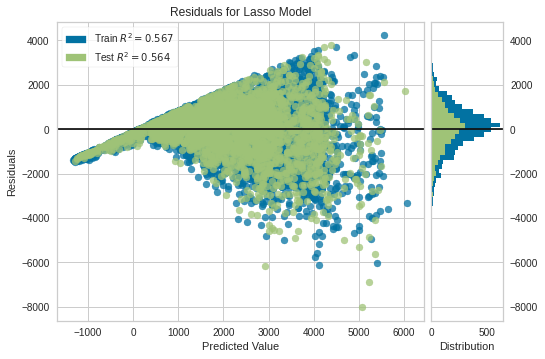

In [ ]:
# tracer un modèle 
plot_model ( LR)

In [ ]:
# evaluate a model 
evaluate_model(LR)
 

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
# predictions on hold-out set
lr_pred_holdout = predict_model(LR)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Lasso,842.1129,1.332138e+06,1154.183,0.5638,0.6908,0.9074


In [ ]:
# predictions on new dataset
test= pd.read_csv("/content/test_AbJTz2l.csv")
lr_pred_new = predict_model(LR, data = test) #new_data is pd dataframe
lr_pred_new.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Label
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,1810.5243
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,1449.5623
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,1911.3576
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,2522.5813
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,5096.9632


In [ ]:
# finalize model
lr_final = finalize_model(LR)

In [ ]:
#save_experiment('Experiment_123 08Feb2020')
save_model(LR, "submission-lassoRegression-21082020.csv")

Transformation Pipeline and Model Succesfully Saved


In [ ]:
saved_LR = load_model('submission-lassoRegression-21082020.csv')

Transformation Pipeline and Model Sucessfully Loaded
